In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

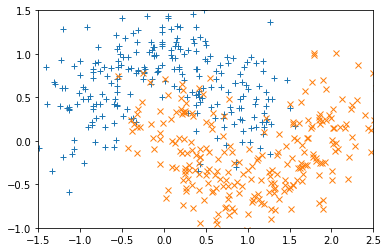

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

def plot_data():
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], '+')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'x')
    plt.axis([-1.5, 2.5, -1, 1.5])
    
plt.figure()
plot_data()
plt.show()

In [3]:
from sklearn.metrics import accuracy_score

def fit_and_evaluate(clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
def plot_decision_boundary(clf):
    axis = [-1.5, 2.5, -1, 1.5]
    x1s = np.linspace(axis[0], axis[1], 100)
    x2s = np.linspace(axis[2], axis[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(xs).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    plt.axis(axis)

AdaBoost

AdaBoostClassifier 0.896


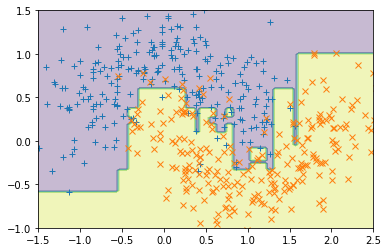

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

fit_and_evaluate(ada_clf)

plt.figure()
plot_data()
plot_decision_boundary(ada_clf)
plt.show()